In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_clustering.csv')
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


# Data Analysis

In [3]:
df.dtypes

id                                   object
customer_age                        float64
job_type                             object
marital                              object
education                            object
default                              object
balance                             float64
housing_loan                         object
personal_loan                        object
communication_type                   object
day_of_month                          int64
month                                object
last_contact_duration               float64
num_contacts_in_campaign            float64
days_since_prev_campaign_contact    float64
num_contacts_prev_campaign            int64
prev_campaign_outcome                object
term_deposit_subscribed               int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [5]:
df.isnull().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# drop the customer id column as it has no influence on the data
df1 = df.drop('id',axis=1).copy()
df1

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [8]:
for i in df1:
    print(i + ':')
    print(df1[i].value_counts())

customer_age:
34.0    1369
33.0    1344
32.0    1312
31.0    1258
36.0    1223
        ... 
95.0       1
97.0       1
89.0       1
93.0       1
92.0       1
Name: customer_age, Length: 77, dtype: int64
job_type:
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: job_type, dtype: int64
marital:
married     18945
single       8857
divorced     3695
Name: marital, dtype: int64
education:
secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: education, dtype: int64
default:
no     31094
yes      553
Name: default, dtype: int64
balance:
 3.0        350
 1.0        324
 0.0        310
 4.0        298
-1.0        285
           ... 
 8110.0       1
-841.0        1
 11420.0      1
 5640.0       1
-511.0        1
Name: balance, Length: 6563, dtype: int

In [9]:
# because there are 150 null values in "marital", let's add a new category
df1['marital'] = df1['marital'].fillna('unknown')

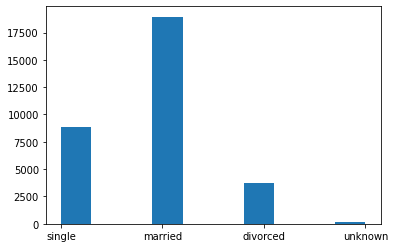

In [10]:
# now, let's estimate the customer's age, depedending on the age of those married/not married/ unknown
plt.hist(df1['marital']);

In [11]:
mean_married = df1[df1['marital']=='married']['customer_age'].mean()
mean_not_married = df1[df1['marital']!='married']['customer_age'].mean()
mean_unknown = df1[df1['marital']=='unknown']['customer_age'].mean()

median_married = df1[df1['marital']=='married']['customer_age'].median()
median_not_married = df1[df1['marital']!='married']['customer_age'].median()
median_unknown = df1[df1['marital']=='unknown']['customer_age'].median()

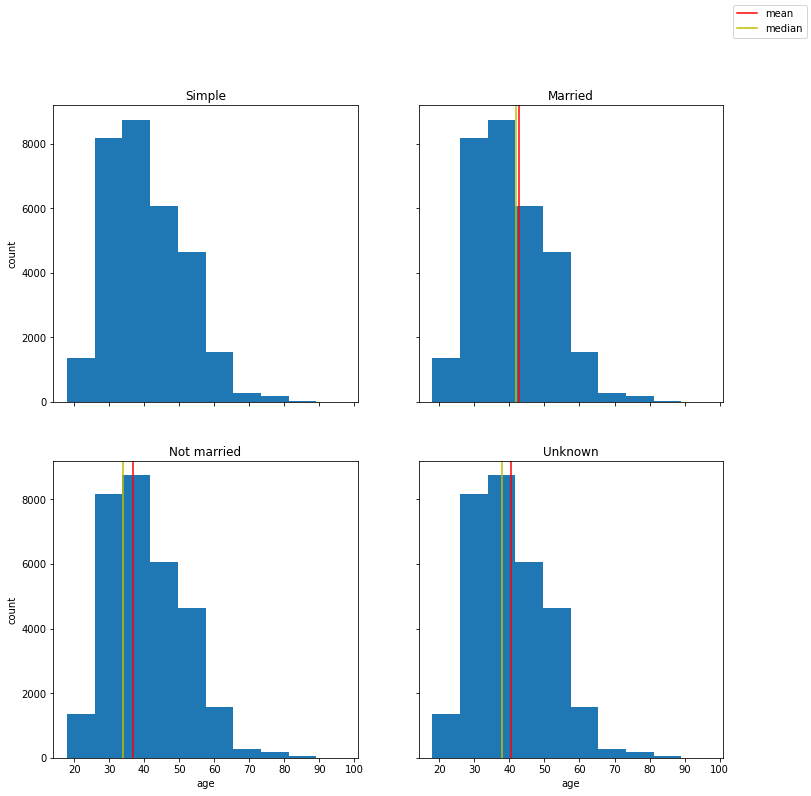

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].hist(df1['customer_age'])
axs[0, 0].set_title('Simple')

axs[0, 1].hist(df1['customer_age'])
axs[0, 1].axvline(mean_married, color='r', label = "mean")
axs[0, 1].axvline(median_married, color='y', label = "median")
axs[0, 1].set_title('Married')

axs[1, 0].hist(df1['customer_age'])
axs[1, 0].axvline(mean_not_married, color='r')
axs[1, 0].axvline(median_not_married, color='y')
axs[1, 0].set_title('Not married')

axs[1, 1].hist(df1['customer_age'])
axs[1, 1].axvline(mean_unknown, color='r')
axs[1, 1].axvline(median_unknown, color='y')
axs[1, 1].set_title('Unknown')

for ax in axs.flat:
    ax.set(xlabel='age', ylabel='count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.legend()


In [13]:
for i in range(len(df1)):
    if pd.isna(df1['customer_age'][i]):
#         print(df1['customer_age'][i])
        if df1['marital'][i] == 'single':
            df1['customer_age'][i] = round(median_not_married)
        if df1['marital'][i] == 'divorced':
            df1['customer_age'][i] = round(median_not_married)
        if df1['marital'][i] == 'married':
            df1['customer_age'][i] = round(mean_married)
        if df1['marital'][i] == 'unknown':
            df1['customer_age'][i] = round(median_unknown)

C:\Users\Darinela\AppData\Local\Temp/ipykernel_15544/3158949001.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_age'][i] = round(mean_married)
C:\Users\Darinela\AppData\Local\Temp/ipykernel_15544/3158949001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_age'][i] = round(median_not_married)
C:\Users\Darinela\AppData\Local\Temp/ipykernel_15544/3158949001.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [14]:
df1['customer_age'].isna().sum()

0

In [15]:
df1['month'].value_counts()

may    9685
jul    4786
aug    4308
jun    3746
nov    2801
apr    2111
feb    1836
jan     953
oct     510
sep     417
mar     338
dec     156
Name: month, dtype: int64

In [16]:
df1['month'] = df1['month'].replace('jan', 1)
df1['month'] = df1['month'].replace('feb', 2)
df1['month'] = df1['month'].replace('mar', 3)
df1['month'] = df1['month'].replace('apr', 4)
df1['month'] = df1['month'].replace('may', 5)
df1['month'] = df1['month'].replace('jun', 6)
df1['month'] = df1['month'].replace('jul', 7)
df1['month'] = df1['month'].replace('aug', 8)
df1['month'] = df1['month'].replace('sep', 9)
df1['month'] = df1['month'].replace('oct', 10)
df1['month'] = df1['month'].replace('nov', 11)
df1['month'] = df1['month'].replace('dec', 12)

In [17]:
df1['default'] = df1['default'].replace('yes', 1)
df1['default'] = df1['default'].replace('no', 0)

df1['housing_loan'] = df1['housing_loan'].replace('yes', 1)
df1['housing_loan'] = df1['housing_loan'].replace('no', 0)

df1['personal_loan'] = df1['personal_loan'].replace('yes', 1)
df1['personal_loan'] = df1['personal_loan'].replace('no', 0)

In [18]:
df1.describe()

,customer_age,default,balance,housing_loan,personal_loan,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31647.000000,31647.000000,31248.000000,31647.000000,31498.000000,31647.000000,31647.00000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.417575,0.017474,1368.112615,0.559295,0.159851,15.818561,6.14548,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.664657,0.131031,3085.342417,0.496480,0.366474,8.322970,2.40653,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,0.000000,-8020.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,72.000000,0.000000,0.000000,8.000000,5.00000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,0.000000,449.000000,1.000000,0.000000,16.000000,6.00000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,0.000000,1413.000000,1.000000,0.000000,21.000000,8.00000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,1.000000,102128.000000,1.000000,1.000000,31.000000,12.00000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [19]:
# statistical values are zero
df1.drop('num_contacts_prev_campaign',axis=1,inplace=True)

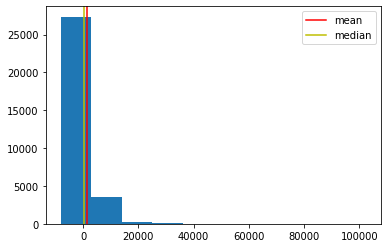

In [20]:
plt.hist(df1['balance']);
plt.axvline(df1['balance'].mean(), color='r', label = "mean")
plt.axvline(df1['balance'].median(), color='y', label = "median")
plt.legend()

In [21]:
# replace null values with mean
df1['balance'] = df1['balance'].fillna(df1['balance'].mean())

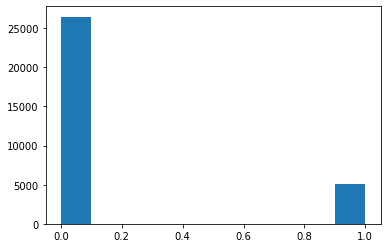

In [22]:
plt.hist(df1['personal_loan']);

In [23]:
# replace with most frequent value
df1['personal_loan'] = df1['personal_loan'].fillna(0)

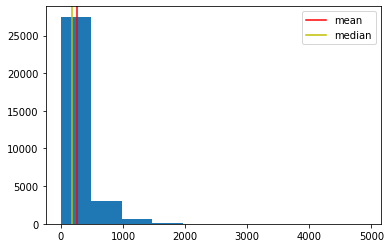

In [24]:
plt.hist(df1['last_contact_duration']);
plt.axvline(df1['last_contact_duration'].mean(), color='r', label = "mean")
plt.axvline(df1['last_contact_duration'].median(), color='y', label = "median")
plt.legend()

In [25]:
# replace null values with mean
df1['last_contact_duration'] = df1['last_contact_duration'].fillna(df1['last_contact_duration'].mean())

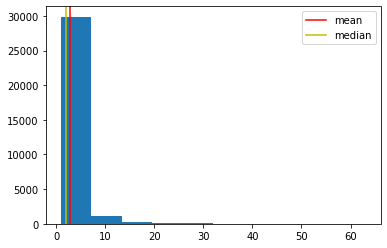

In [26]:
plt.hist(df1['num_contacts_in_campaign']);
plt.axvline(df1['num_contacts_in_campaign'].mean(), color='r', label = "mean")
plt.axvline(df1['num_contacts_in_campaign'].median(), color='y', label = "median")
plt.legend()

In [27]:
# replace null values with mean
df1['num_contacts_in_campaign'] = df1['num_contacts_in_campaign'].fillna(df1['num_contacts_in_campaign'].mean())

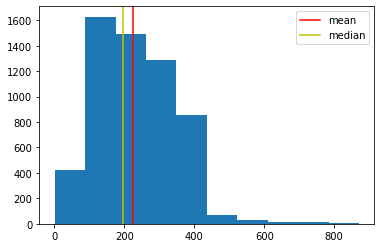

In [28]:
plt.hist(df1['days_since_prev_campaign_contact']);
plt.axvline(df1['days_since_prev_campaign_contact'].mean(), color='r', label = "mean")
plt.axvline(df1['days_since_prev_campaign_contact'].median(), color='y', label = "median")
plt.legend()

In [29]:
# replace null values with mean
df1['days_since_prev_campaign_contact'] = df1['days_since_prev_campaign_contact'].fillna(df1['days_since_prev_campaign_contact'].mean())

In [30]:
df1['marital'] = df1['marital'].replace('married', 1)
df1['marital'] = df1['marital'].replace('single', 0)
df1['marital'] = df1['marital'].replace('divorced', 0)
df1['marital'] = df1['marital'].replace('unknown', 0)

df1['education'] = df1['education'].replace('primary', 1)
df1['education'] = df1['education'].replace('secondary', 2)
df1['education'] = df1['education'].replace('tertiary', 3)
df1['education'] = df1['education'].replace('unknown', 0)

df1['communication_type'] = df1['communication_type'].replace('unknown', 'unknown_communication_type')
df1['prev_campaign_outcome'] = df1['prev_campaign_outcome'].replace('unknown', 'unknown_campaign_outcome')

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      31647 non-null  float64
 1   job_type                          31647 non-null  object 
 2   marital                           31647 non-null  int64  
 3   education                         31647 non-null  int64  
 4   default                           31647 non-null  int64  
 5   balance                           31647 non-null  float64
 6   housing_loan                      31647 non-null  int64  
 7   personal_loan                     31647 non-null  float64
 8   communication_type                31647 non-null  object 
 9   day_of_month                      31647 non-null  int64  
 10  month                             31647 non-null  int64  
 11  last_contact_duration             31647 non-null  float64
 12  num_

In [32]:
# df1 = df1.astype('int')


<AxesSubplot:>

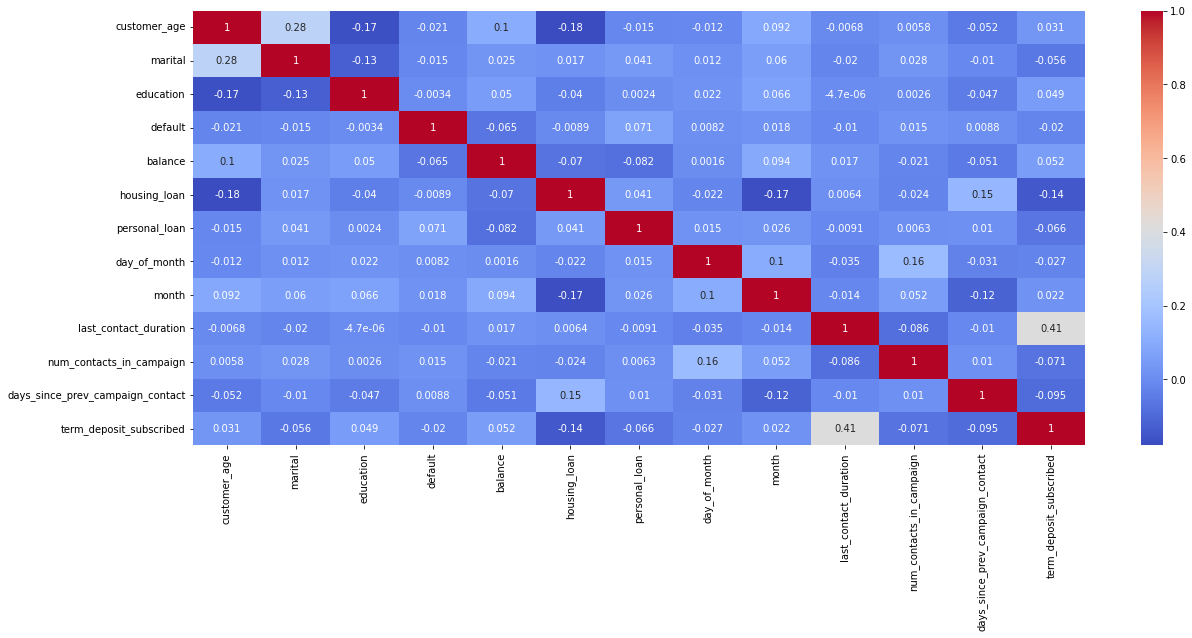

In [33]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')

In [34]:
# # Handling Categorical Data
from sklearn.preprocessing import OneHotEncoder
df1['job_type'] = df1['job_type'].replace('unknown', 'unknown_job_type')
onehotencoder = pd.get_dummies(df1['job_type'], drop_first=True)
# Drop column non_numeric_col as it is now encoded
df1 = df1.drop('job_type',axis = 1)
# # Join the encoded dataframe to X
df1 = df1.join(onehotencoder)

In [35]:
onehotencoder = pd.get_dummies(df1['prev_campaign_outcome'], drop_first=True)
# Drop column non_numeric_col as it is now encoded
df1 = df1.drop('prev_campaign_outcome',axis = 1)
# Join the encoded dataframe to X
df1 = df1.join(onehotencoder)

In [36]:
onehotencoder = pd.get_dummies(df1['communication_type'], drop_first=True)
# Drop column non_numeric_col as it is now encoded
df1 = df1.drop('communication_type',axis = 1)
# # Join the encoded dataframe to X
df1 = df1.join(onehotencoder)

In [37]:
# from sklearn.preprocessing import OrdinalEncoder
# #Finidng all the columns with object dtype data
# s = (df1.dtypes == 'object')
# object_cols = list(s[s].index)

# ordinal_encoder = OrdinalEncoder()
# df1[object_cols] = ordinal_encoder.fit_transform(df1[object_cols])
# df1

In [38]:
df1

,customer_age,marital,education,default,balance,housing_loan,personal_loan,day_of_month,month,last_contact_duration,...,services,student,technician,unemployed,unknown_job_type,other,success,unknown_campaign_outcome,telephone,unknown_communication_type
0,28.0,0,3,0,285.0,1,0.0,26,6,303.0,...,0,0,0,0,0,0,0,1,0,1
1,34.0,1,2,0,934.0,0,1.0,18,11,143.0,...,0,0,0,0,0,1,0,0,0,0
2,46.0,1,2,0,656.0,0,0.0,5,2,101.0,...,0,0,1,0,0,0,0,1,0,0
3,34.0,0,2,0,2.0,1,0.0,20,5,127.0,...,1,0,0,0,0,0,0,1,0,1
4,41.0,1,1,0,1352.0,1,0.0,13,5,49.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,1,2,0,567.0,1,0.0,2,2,99.0,...,0,0,0,0,0,1,0,0,0,0
31643,51.0,1,3,0,1072.0,0,0.0,20,6,31.0,...,0,0,0,0,0,0,0,1,0,1
31644,41.0,1,1,0,242.0,1,0.0,23,5,89.0,...,0,0,0,1,0,0,0,1,0,1
31645,48.0,1,2,0,2699.0,0,0.0,11,8,216.0,...,1,0,0,0,0,0,0,1,0,0


In [39]:
X = df1.drop('term_deposit_subscribed',axis = 1)
y = df1['term_deposit_subscribed']

In [52]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Clustering

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(X_train)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_train, preds, sample_size=5000)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8392169404523371)
For n_clusters = 3, silhouette score is 0.7754299636785332)
For n_clusters = 4, silhouette score is 0.7743486969440566)
For n_clusters = 5, silhouette score is 0.6904659335472845)
For n_clusters = 6, silhouette score is 0.6536580938862914)
For n_clusters = 7, silhouette score is 0.5937919448077772)
For n_clusters = 8, silhouette score is 0.5763394660548784)
For n_clusters = 9, silhouette score is 0.5283440519720873)
For n_clusters = 10, silhouette score is 0.5338474592661956)
For n_clusters = 11, silhouette score is 0.43763518508603727)
For n_clusters = 12, silhouette score is 0.44380141347706414)
For n_clusters = 13, silhouette score is 0.41397053525108585)
For n_clusters = 14, silhouette score is 0.44844173762975204)
For n_clusters = 15, silhouette score is 0.4369481545511858)
For n_clusters = 16, silhouette score is 0.4430069820906044)
For n_clusters = 17, silhouette score is 0.4404342688219007)
For n_clusters = 18, silhoue

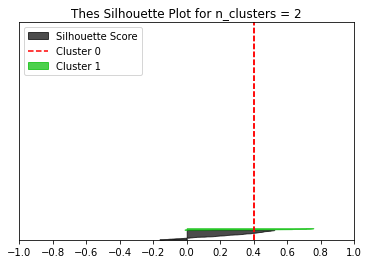

In [54]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def draw_silhouette_plot(X, n_clusters):
    clusters = KMeans(n_clusters = n_clusters, random_state = 69)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    #Compute the silhouette score for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Set Silhouette Score ranges from -1 to 1
    plt.xlim([-1, 1])
    # The (n_clusters + 1) ∗ 10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly .
    plt.ylim([0, len(X) + (n_clusters+1)*10])
    plt.yticks([])
    plt.xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color =cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color
                         , edgecolor = color, alpha = 0.7)
        
        y_lower = y_upper +10
        
        plt.axvline(x = silhouette_avg, color="red", linestyle="--")
        plt.title(f'Thes Silhouette Plot for n_clusters = {n_clusters}')
        
        plt.legend(['Silhouette Score']+[f'Cluster {i}' for i in range(n_clusters)])
        
draw_silhouette_plot(X_train, 2)

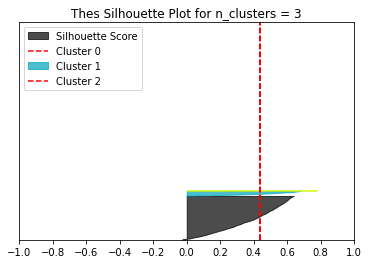

In [55]:
draw_silhouette_plot(X_train, 3)

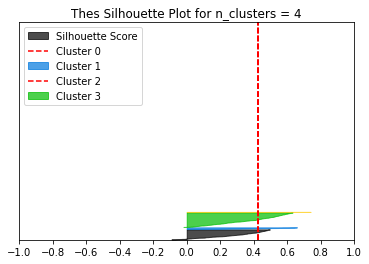

In [56]:
draw_silhouette_plot(X_train, 4)

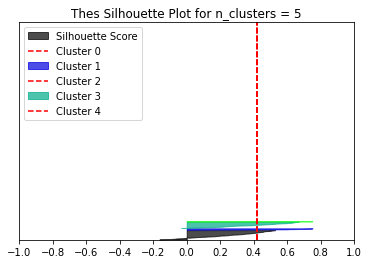

In [57]:
draw_silhouette_plot(X_train, 5)

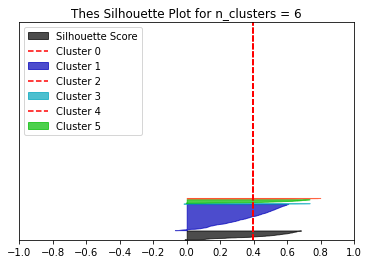

In [58]:
draw_silhouette_plot(X_train, 6)

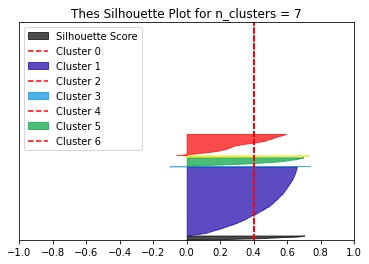

In [59]:
draw_silhouette_plot(X_train, 7)

In [65]:
# The best silhouette score was for 7 clusters (KMeans)

C:\Users\Darinela\AppData\Local\Temp/ipykernel_15544/3686326599.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, S, 'bo-', color='black')


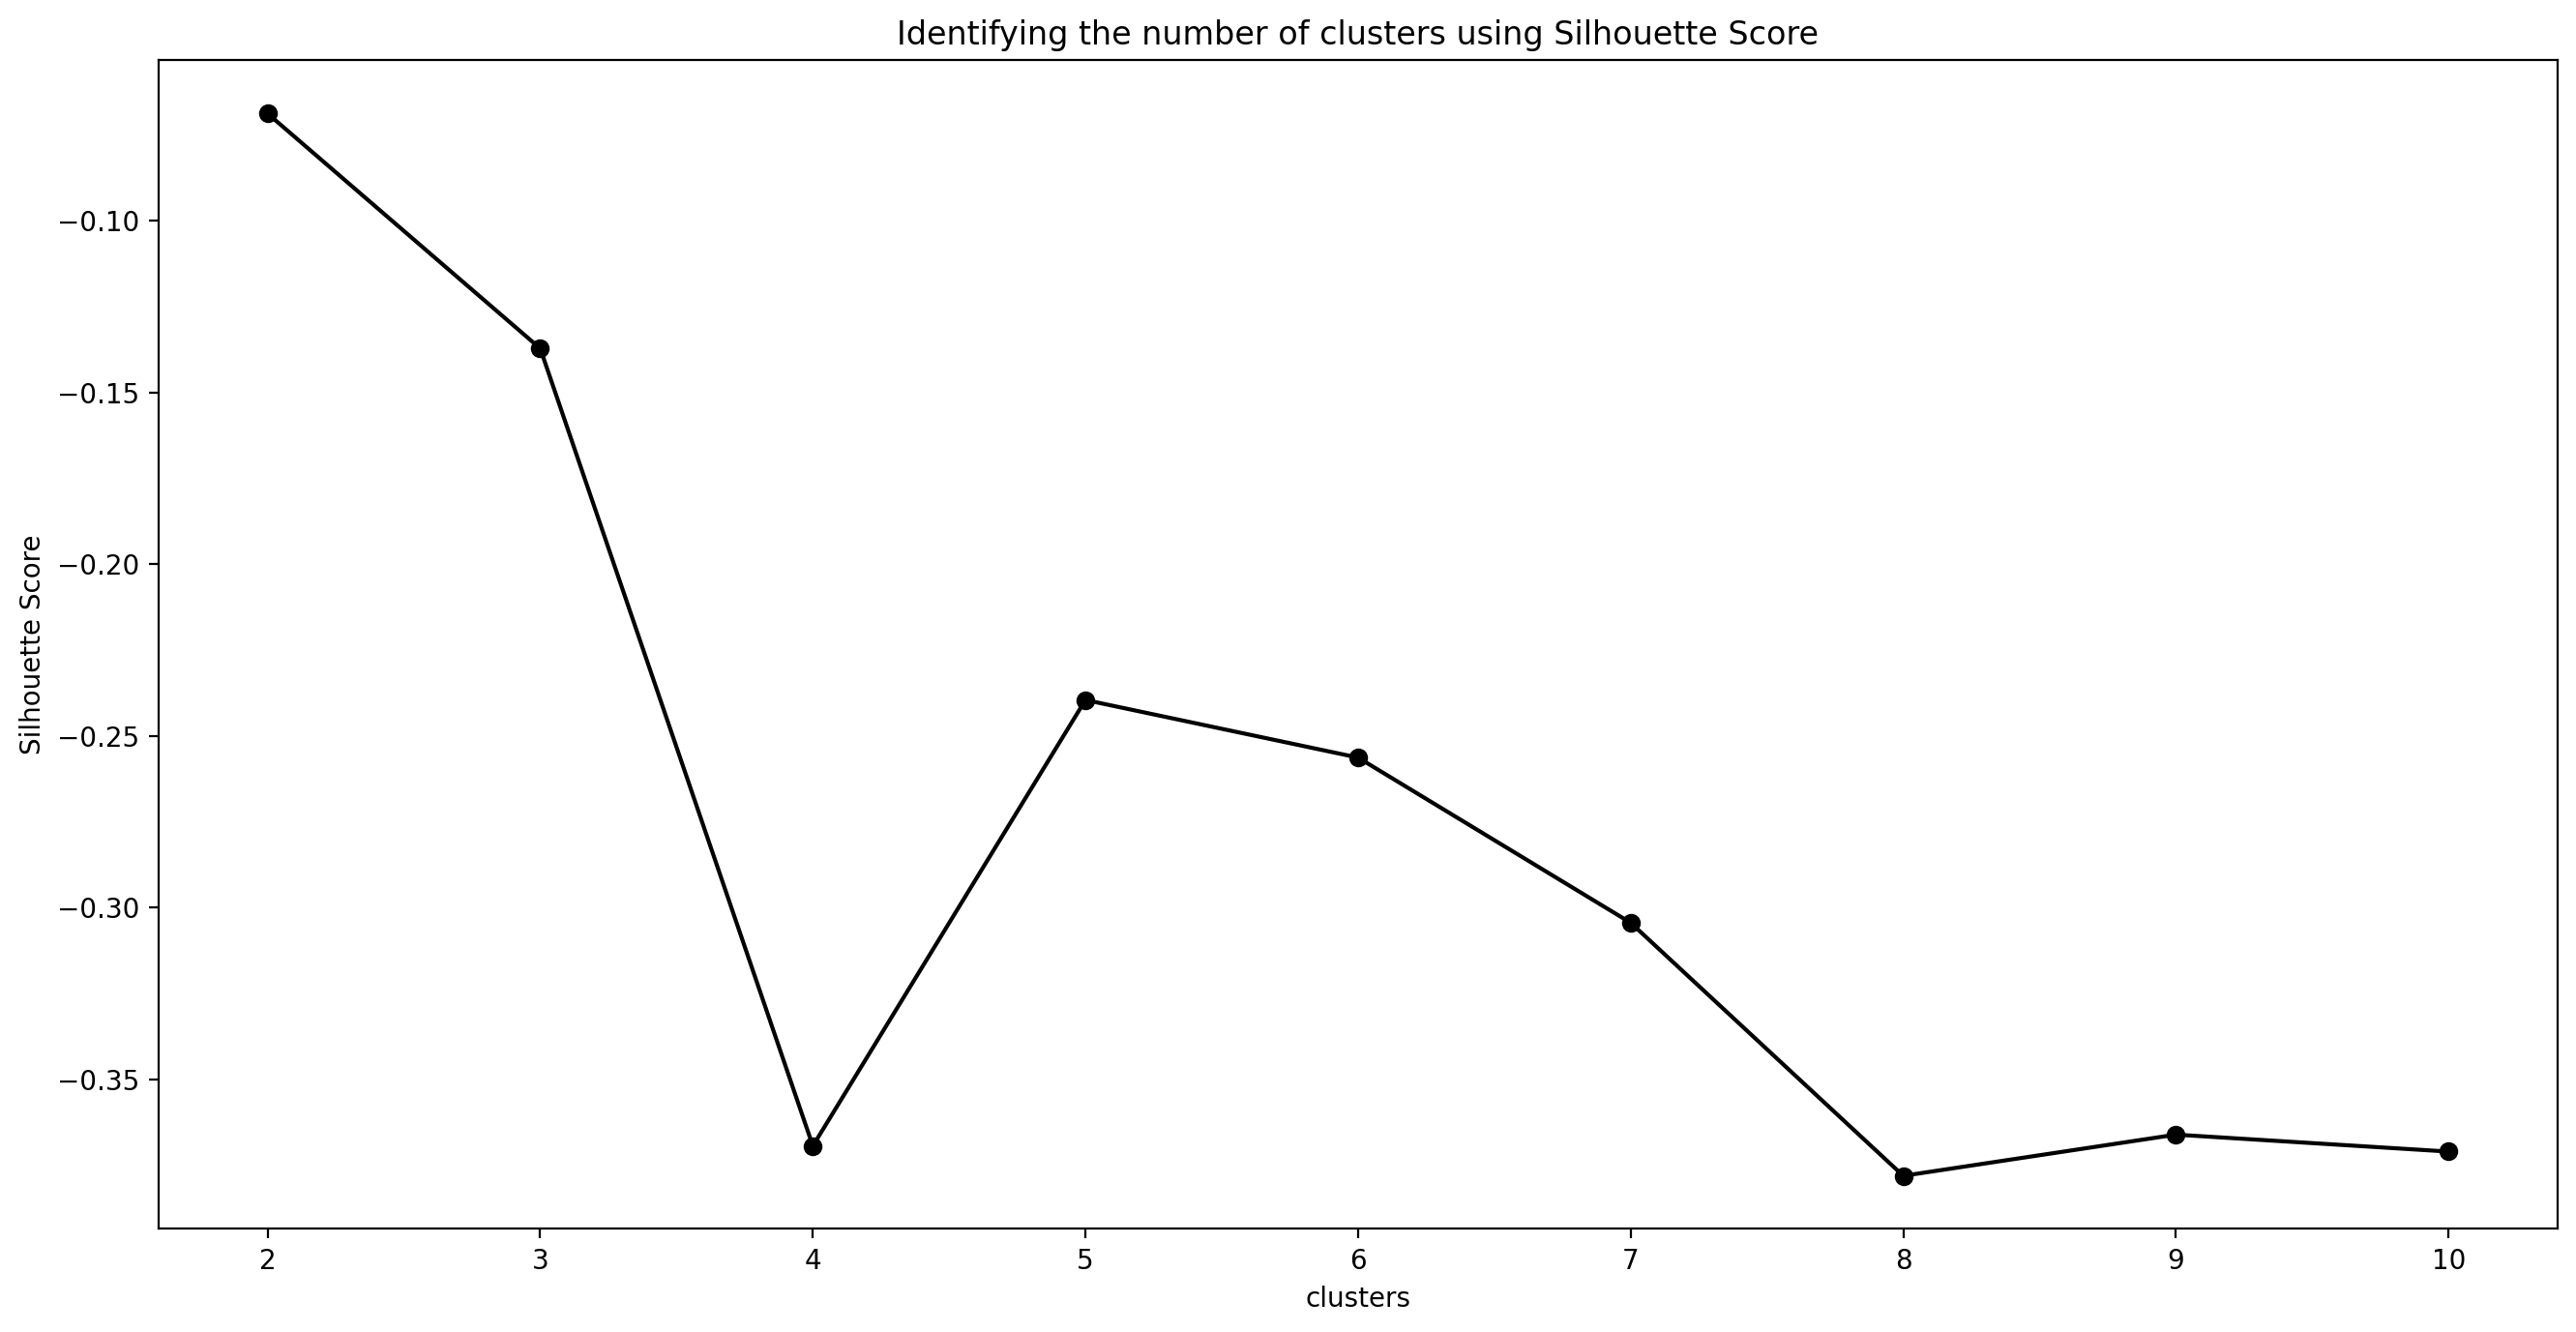

In [64]:
from sklearn.mixture import GaussianMixture
# Create empty list
scores=[]
for i in range(2,10):
    gmm = GaussianMixture(n_components=i, n_init=20, init_params='kmeans')
    labels = gmm.fit_predict(X_train)
    scores.append(silhouette_score(X_train, labels, metric='euclidean'))

plt.figure(figsize=(16,8), dpi=200)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('clusters')
plt.ylabel('Silhouette Score')
plt.title('Identifying the number of clusters using Silhouette Score')
plt.show()

In [68]:
clusters = KMeans(n_clusters = 7, random_state=69)
clusters.fit(X_train)
print('''Cluster's centers:\n''', clusters.cluster_centers_)


Cluster's centers:
 [[ 4.15570108e+01  6.32511556e-01  2.07164869e+00  3.85208012e-03
   1.81530527e+03  5.39291217e-01  1.31741140e-01  1.56856703e+01
   6.22958398e+00  2.70967033e+02  2.71810980e+00  2.21768163e+02
   2.19568567e-01  3.38983051e-02  2.77349769e-02  2.32665639e-01
   5.85516179e-02  4.00616333e-02  8.08936826e-02  1.92604006e-02
   1.40986133e-01  2.77349769e-02  8.47457627e-03  4.39137134e-02
   4.77657935e-02  7.88135593e-01  7.39599384e-02  2.79661017e-01]
 [ 4.40000000e+01  5.83333333e-01  2.27777778e+00  0.00000000e+00
   2.17915833e+04  4.72222222e-01  2.77777778e-02  1.59444444e+01
   7.11111111e+00  2.43260224e+02  2.91666667e+00  2.02468879e+02
   5.55555556e-02  5.55555556e-02  3.46944695e-18  3.88888889e-01
   1.11111111e-01  5.55555556e-02  5.55555556e-02  0.00000000e+00
   1.38888889e-01  0.00000000e+00  2.77777778e-02  1.38888889e-01
   2.77777778e-02  6.94444444e-01  1.38777878e-17  2.77777778e-01]
 [ 4.32974359e+01  5.94871795e-01  2.18461538e+00  0.0

In [73]:
from sklearn.metrics import accuracy_score
y_pred = gmm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.030729125523343077
